In [1]:
rm(list = ls())

library(tidyverse)
library(data.table)
library(lubridate)

raw_dat <- fread("https://raw.githubusercontent.com/smangul1/data_reusability/master/data_tables/metadataMatrix_filtered.csv") %>% 
  as_tibble %>% 
  mutate(reuse_role = if_else(reuse_role == "G", "Primary","Secondary"))

raw_dat %>% as.data.frame %>% head

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose



Attaching package: ‘lubridate’


The following objects are masked from ‘package:data.table’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




,journal,pmc_ID,accession,converted_accession,repository,pmc_date,repository_date,species,hardware,library_strategy,sraAvg_length,sraBases,sraAccess,today,time_public,reuse_count,norm_reuse_count,reuse_role,pub_delay,class
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<date>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<chr>
1,Mol_Cancer,PMC6320601,GSE98383,GSE98383,GEO,2019-01-04 00:00:00,2018-04-09,Homo sapiens,,,NA,NA,,2020-09-28,2.473973,3,1.212625,Primary,270,
2,Nucleus,PMC4615760,GSE52415,GSE52415,GEO,2014-11-06 00:00:00,2014-02-09,Bos taurus,high-throughput sequencing,RNA-Seq,NA,NA,,2020-09-28,6.638356,7,1.054478,Primary,270,RNA-Seq
3,PLoS_One,PMC4351248,GSE58201,GSE58201,GEO,2015-03-05 00:00:00,2014-06-08,Homo sapiens,in situ oligonucleotide,Expression_Array,NA,NA,,2020-09-28,6.312329,0,0.000000,Primary,270,GEO_expr
4,PLoS_Genet,PMC6161849,SRR5279891,SRP100609,SRA,2018-09-28 00:00:00,2018-01-01,Brachypodium distachyon,Illumina HiSeq 2500,RNA-Seq,202,13275753302,public,2020-09-28,2.742466,0,0.000000,Primary,270,RNA-Seq
5,Sci_Data,PMC6987088,GSE129732,GSE129732,GEO,2020-01-28 00:00:00,2019-05-03,Homo sapiens,high-throughput sequencing,RNA-Seq,NA,NA,,2020-09-28,1.408219,0,0.000000,Primary,270,RNA-Seq
6,BMC_Biotechnol,PMC5240201,SRR3397076,SRP073395,SRA,2017-01-17 00:00:00,2016-04-22,Homo sapiens,HiSeq X Ten,WGS,302,150856082202,public,2020-09-28,4.438356,0,0.000000,Primary,270,SRA_other


In [2]:
dat <- raw_dat %>% 
  select(pmc_ID, converted_accession, reuse_role, class, pmc_date, repository_date, reuse_count, norm_reuse_count) %>% 
  unique.data.frame
dat

pmc_ID,converted_accession,reuse_role,class,pmc_date,repository_date,reuse_count,norm_reuse_count
<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<int>,<dbl>
PMC6320601,GSE98383,Primary,,2019-01-04 00:00:00,2018-04-09,3,1.2126246
PMC4615760,GSE52415,Primary,RNA-Seq,2014-11-06 00:00:00,2014-02-09,7,1.0544779
PMC4351248,GSE58201,Primary,GEO_expr,2015-03-05 00:00:00,2014-06-08,0,0.0000000
PMC6161849,SRP100609,Primary,RNA-Seq,2018-09-28 00:00:00,2018-01-01,0,0.0000000
PMC6987088,GSE129732,Primary,RNA-Seq,2020-01-28 00:00:00,2019-05-03,0,0.0000000
PMC5240201,SRP073395,Primary,SRA_other,2017-01-17 00:00:00,2016-04-22,0,0.0000000
PMC5240201,SRP073394,Primary,SRA_other,2017-01-17 00:00:00,2016-04-22,0,0.0000000
PMC6842217,SRP185448,Primary,RNA-Seq,2019-11-08 00:00:00,2019-02-11,0,0.0000000
PMC6161849,SRP100505,Primary,RNA-Seq,2018-09-28 00:00:00,2018-01-01,0,0.0000000


In [3]:
citation <- fread("final_citationcount_per_paper.csv") %>% as_tibble %>%
  rename("pmc_ID" = "pmcid") %>% 
  select(pmc_ID, citation_count)
citation

pmc_ID,citation_count
<chr>,<int>
PMC3707052,22
PMC3706879,47
PMC4255636,22
PMC4731966,21
PMC5513091,17
PMC5819208,7
PMC6015462,21
PMC2928186,8
PMC1500996,1


In [4]:
dat <- left_join(dat, citation, "pmc_ID")
dat

pmc_ID,converted_accession,reuse_role,class,pmc_date,repository_date,reuse_count,norm_reuse_count,citation_count
<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<int>,<dbl>,<int>
PMC6320601,GSE98383,Primary,,2019-01-04 00:00:00,2018-04-09,3,1.2126246,30
PMC4615760,GSE52415,Primary,RNA-Seq,2014-11-06 00:00:00,2014-02-09,7,1.0544779,25
PMC4351248,GSE58201,Primary,GEO_expr,2015-03-05 00:00:00,2014-06-08,0,0.0000000,11
PMC6161849,SRP100609,Primary,RNA-Seq,2018-09-28 00:00:00,2018-01-01,0,0.0000000,3
PMC6987088,GSE129732,Primary,RNA-Seq,2020-01-28 00:00:00,2019-05-03,0,0.0000000,0
PMC5240201,SRP073395,Primary,SRA_other,2017-01-17 00:00:00,2016-04-22,0,0.0000000,13
PMC5240201,SRP073394,Primary,SRA_other,2017-01-17 00:00:00,2016-04-22,0,0.0000000,13
PMC6842217,SRP185448,Primary,RNA-Seq,2019-11-08 00:00:00,2019-02-11,0,0.0000000,1
PMC6161849,SRP100505,Primary,RNA-Seq,2018-09-28 00:00:00,2018-01-01,0,0.0000000,3


## Data filtering and generation

In [5]:
primary_acc <- dat %>% 
  filter(reuse_role == "Primary") %>% 
  select(converted_accession) %>% 
  pull %>% 
  unique

primary_secondary_acc <- dat %>% 
  filter(reuse_role != "Primary") %>% 
  filter(converted_accession %in% primary_acc)  %>% 
  select(converted_accession) %>% 
  pull %>% 
  unique
primary_secondary_acc %>% length

[1] 10657

In [6]:
primary_dat <- dat %>% 
  filter(converted_accession %in% primary_secondary_acc) %>% 
  filter(reuse_role == "Primary") %>% 
  group_by(converted_accession, class) %>% 
  summarise(primary_citation=mean(citation_count), .groups = 'drop') %>% 
  ungroup
primary_dat

converted_accession,class,primary_citation
<chr>,<chr>,<dbl>
DRP000010,SRA_other,168
DRP000030,SRA_other,128
DRP000159,SRA_other,60
DRP000170,SRA_other,85
DRP000194,SRA_other,3
DRP000223,SRA_other,14
DRP000308,SRA_other,86
DRP000312,SRA_other,9
DRP000327,SRA_other,382


In [7]:
secondary_dat <- dat %>% 
  filter(converted_accession %in% primary_secondary_acc) %>% 
  filter(reuse_role == "Secondary") %>% 
  group_by(converted_accession) %>% 
  summarise(secondary_citation=sum(citation_count), .groups = 'drop') %>% 
  ungroup
secondary_dat

converted_accession,secondary_citation
<chr>,<int>
DRP000010,81
DRP000030,72
DRP000159,13
DRP000170,48
DRP000194,1
DRP000223,93
DRP000308,87
DRP000312,83
DRP000327,46


In [8]:
reuse_dat <- dat %>% 
  filter(converted_accession %in% primary_secondary_acc) %>% 
  select(converted_accession,reuse_count) %>% 
  unique.data.frame %>% 
  arrange(converted_accession)
reuse_dat

converted_accession,reuse_count
<chr>,<int>
DRP000010,3
DRP000030,1
DRP000159,2
DRP000170,3
DRP000194,1
DRP000223,3
DRP000308,6
DRP000312,4
DRP000327,4


In [9]:
pmcid_dat <- dat %>% 
  filter(converted_accession %in% primary_secondary_acc) %>% 
  filter(reuse_role == "Primary") %>% 
  select(pmc_ID, converted_accession) %>% 
  group_by(converted_accession) %>%
  summarise(pmc_ID = paste(pmc_ID,collapse=';')) %>% 
  rename(primary_pmc_id = pmc_ID)
pmcid_dat

`summarise()` ungrouping output (override with `.groups` argument)



converted_accession,primary_pmc_id
<chr>,<chr>
DRP000010,PMC2874813
DRP000030,PMC2838848
DRP000159,PMC3016417
DRP000170,PMC3223080
DRP000194,PMC3990516
DRP000223,PMC3180464
DRP000308,PMC3037082
DRP000312,PMC3514829
DRP000327,PMC3141275


In [10]:
all.equal(primary_dat$converted_accession, secondary_dat$converted_accession)

[1] TRUE

In [11]:
all.equal(primary_dat$converted_accession, reuse_dat$converted_accession)

[1] TRUE

In [12]:
all.equal(primary_dat$converted_accession, pmcid_dat$converted_accession)

[1] TRUE

In [13]:
tmp_gg_dat <- inner_join(pmcid_dat, primary_dat,"converted_accession")
tmp_gg_dat <- inner_join(tmp_gg_dat, secondary_dat,"converted_accession") 
gg_dat <- inner_join(tmp_gg_dat, reuse_dat,"converted_accession") 
gg_dat

converted_accession,primary_pmc_id,class,primary_citation,secondary_citation,reuse_count
<chr>,<chr>,<chr>,<dbl>,<int>,<int>
DRP000010,PMC2874813,SRA_other,168,81,3
DRP000030,PMC2838848,SRA_other,128,72,1
DRP000159,PMC3016417,SRA_other,60,13,2
DRP000170,PMC3223080,SRA_other,85,48,3
DRP000194,PMC3990516,SRA_other,3,1,1
DRP000223,PMC3180464,SRA_other,14,93,3
DRP000308,PMC3037082,SRA_other,86,87,6
DRP000312,PMC3514829,SRA_other,9,83,4
DRP000327,PMC3141275,SRA_other,382,46,4


In [14]:
openxlsx::write.xlsx(gg_dat,"data_reusability/citation_reuse_data.xlsx")
f_gg_dat <- gg_dat %>% filter(reuse_count > 10)
f_gg_dat

converted_accession,primary_pmc_id,class,primary_citation,secondary_citation,reuse_count
<chr>,<chr>,<chr>,<dbl>,<int>,<int>
DRP001031,PMC4067614,SRA_other,9,360,11
DRP001032,PMC4383935,SRA_other,33,472,13
ERP000546,PMC3245612,RNA-Seq,423,2865,55
ERP001731,PMC3800747,SRA_other,542,1175,14
ERP004714,PMC4223845,RNA-Seq,4,321,11
GSE10072,PMC2249927,GEO_expr,340,3194,136
GSE10246,PMC2394514,GEO_expr,265,5515,76
GSE10645,PMC2565588,GEO_expr,116,235,22
GSE11151,PMC2686725,GEO_expr,114,385,25


# 1. More citations from secondary analysis compared to primary

In [15]:
n_more_secondary <- gg_dat %>% 
  mutate(diff_citation = secondary_citation - primary_citation) %>% 
  filter(diff_citation > 0) %>% 
  group_by(class) %>% 
  count %>% 
  ungroup %>% 
  select(n) %>% 
  pull %>% 
  sum

n_more_secondary / nrow(gg_dat) * 100

n_type_more_secondary <- gg_dat %>% 
  mutate(diff_citation = secondary_citation - primary_citation) %>% 
  filter(diff_citation > 0) %>% 
  group_by(class) %>% 
  count %>% ungroup %>% 
  mutate(percent = round(n / nrow(gg_dat) * 100,2))

n_type_more_secondary <- rbind(n_type_more_secondary, 
                               data.frame(class = "Tot", 
                                          n = sum(n_type_more_secondary$n), 
                                          percent = sum(n_type_more_secondary$percent)))

n_type_more_secondary$percent <- paste0(n_type_more_secondary$percent,"%")
n_type_more_secondary <- n_type_more_secondary %>% arrange(desc(n))
n_type_more_secondary

[1] 29.30468

class,n,percent
<chr>,<int>,<chr>
Tot,3123,29.31%
GEO_expr,1154,10.83%
RNA-Seq,898,8.43%
SRA_other,548,5.14%
,523,4.91%


## 1-1. More citations from secondary analysis compared to primary (reused at least 10 times)

In [16]:
n_more_secondary <- f_gg_dat %>% 
  mutate(diff_citation = secondary_citation - primary_citation) %>% 
  filter(diff_citation > 0) %>% 
  group_by(class) %>% 
  count %>% 
  ungroup %>% 
  select(n) %>% 
  pull %>% 
  sum

n_more_secondary / nrow(f_gg_dat) * 100

n_type_more_secondary <- f_gg_dat %>% 
  mutate(diff_citation = secondary_citation - primary_citation) %>% 
  filter(diff_citation > 0) %>% 
  group_by(class) %>% 
  count %>% ungroup %>% 
  mutate(percent = round(n / nrow(f_gg_dat) * 100,2))


n_type_more_secondary <- rbind(n_type_more_secondary, 
                               data.frame(class = "Tot", 
                                          n = sum(n_type_more_secondary$n), 
                                          percent = sum(n_type_more_secondary$percent)))

n_type_more_secondary$percent <- paste0(n_type_more_secondary$percent,"%")
n_type_more_secondary <- n_type_more_secondary %>% arrange(desc(n))
n_type_more_secondary

[1] 92.28487

class,n,percent
<chr>,<int>,<chr>
Tot,311,92.29%
GEO_expr,197,58.46%
,70,20.77%
RNA-Seq,29,8.61%
SRA_other,15,4.45%


# 2. plot for primary citation and secondary citation

Warning message:
“Removed 807 rows containing non-finite values (stat_boxplot).”


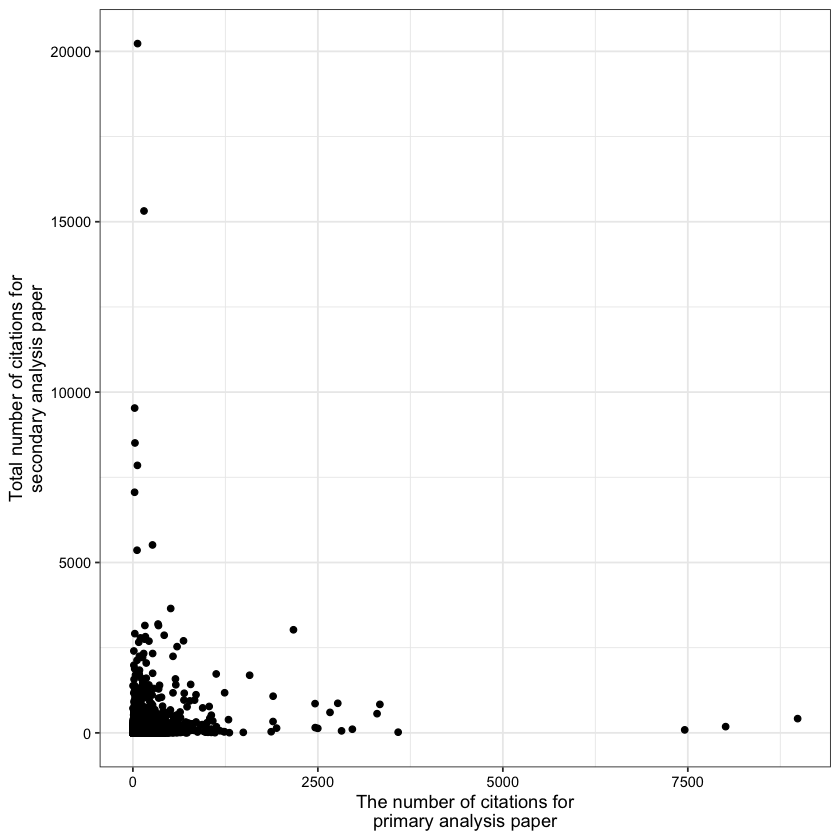

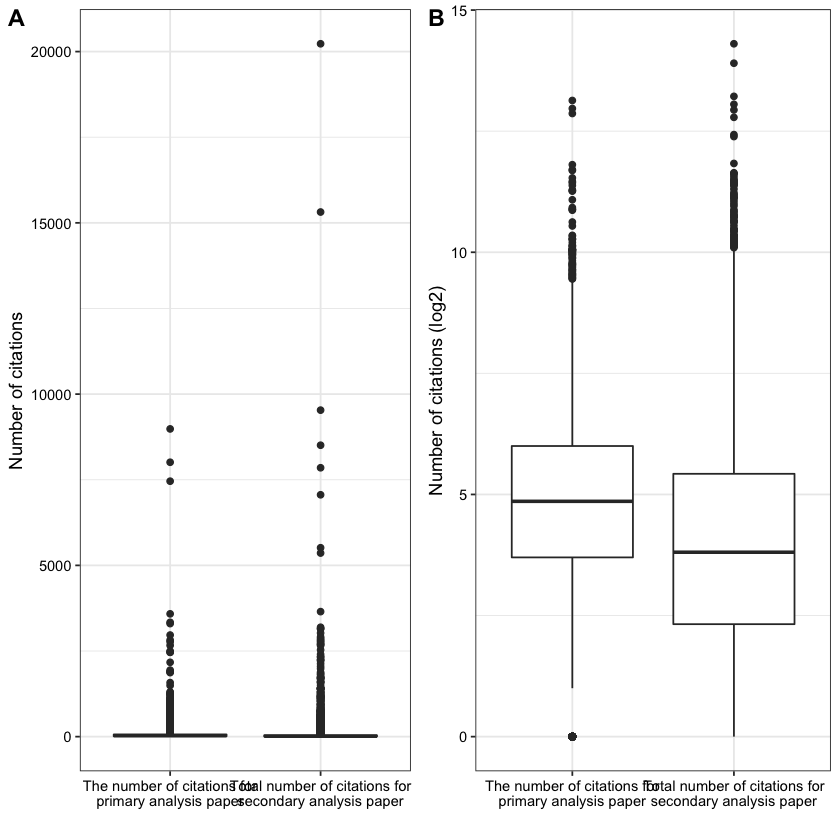

In [17]:
ggplot(gg_dat, aes(primary_citation, secondary_citation))+
  geom_point() +
  theme_bw() +
  xlab("The number of citations for\nprimary analysis paper") +
  ylab("Total number of citations for\nsecondary analysis paper") +
  theme(axis.text = element_text(color = "black")) +
  ggsave("fig_citation_reusability/citation.png",units = "in",width = 5, height = 5)


gg_dat_1 <- gg_dat %>% select(-converted_accession) %>%
  gather("type","value",primary_citation:secondary_citation) %>%
  mutate(type_name = if_else(type == "primary_citation","The number of citations for\nprimary analysis paper","Total number of citations for\nsecondary analysis paper"))

ggplot_dat_1 <- ggplot(gg_dat_1, aes(type_name, value))+
  geom_boxplot() +
  theme_bw() +
  xlab("") +
  ylab("Number of citations") +
  theme(axis.text = element_text(color = "black"))

ggplot_dat_2 <- ggplot(gg_dat_1, aes(type_name, log2(value)))+
  geom_boxplot() +
  theme_bw() +
  xlab("") +
  ylab("Number of citations (log2)") +
  theme(axis.text = element_text(color = "black"))

cowplot::plot_grid(ggplot_dat_1, ggplot_dat_2, labels = c("A","B")) +
  ggsave("fig_citation_reusability/citation2.png",units = "in",width = 9, height = 5)



## 2-1. plot for primary citation and secondary citation (reused at least 10 times)

Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”


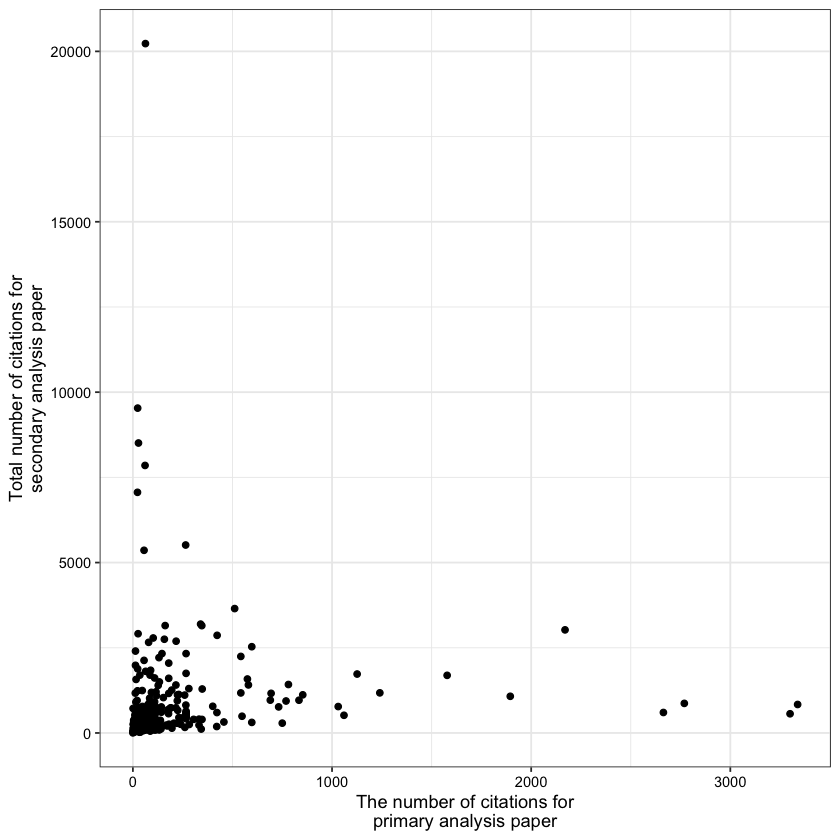

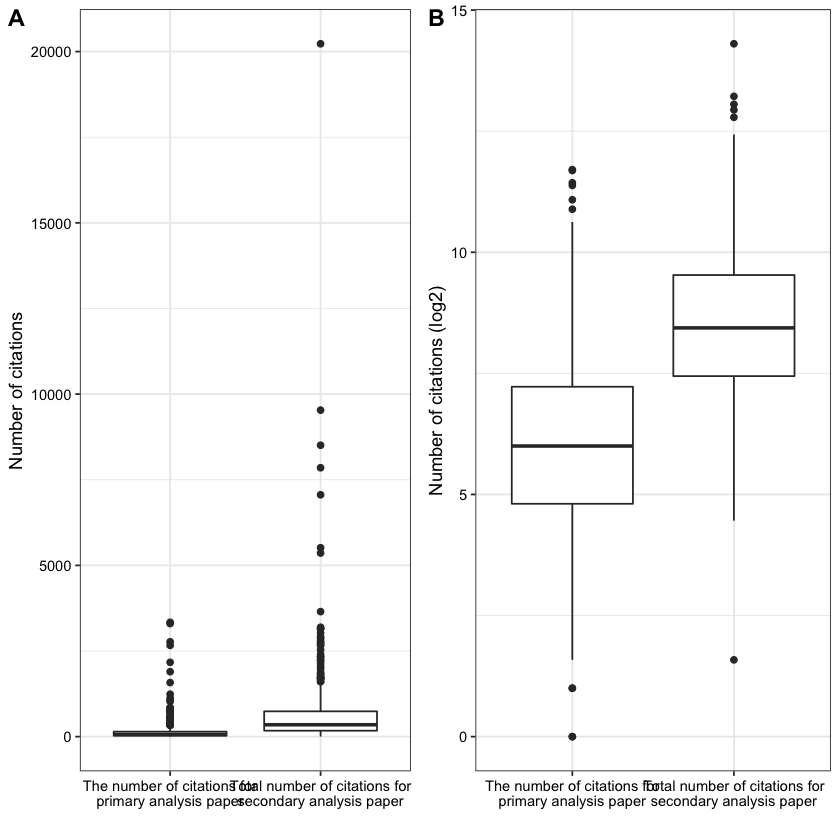

In [18]:
ggplot(f_gg_dat, aes(primary_citation, secondary_citation))+
  geom_point() +
  theme_bw() +
  xlab("The number of citations for\nprimary analysis paper") +
  ylab("Total number of citations for\nsecondary analysis paper") +
  theme(axis.text = element_text(color = "black")) +
  ggsave("fig_citation_reusability/citation_reuse10fitering.png",units = "in",width = 5, height = 5)

f_gg_dat_1 <- f_gg_dat %>% select(-converted_accession) %>%
  gather("type","value",primary_citation:secondary_citation) %>%
  mutate(type_name = if_else(type == "primary_citation","The number of citations for\nprimary analysis paper","Total number of citations for\nsecondary analysis paper"))

ggplot_dat_1 <- ggplot(f_gg_dat_1, aes(type_name, value))+
  geom_boxplot() +
  theme_bw() +
  xlab("") +
  ylab("Number of citations") +
  theme(axis.text = element_text(color = "black"))

ggplot_dat_2 <- ggplot(f_gg_dat_1, aes(type_name, log2(value)))+
  geom_boxplot() +
  theme_bw() +
  xlab("") +
  ylab("Number of citations (log2)") +
  theme(axis.text = element_text(color = "black"))

cowplot::plot_grid(ggplot_dat_1, ggplot_dat_2, labels = c("A","B")) +
  ggsave("fig_citation_reusability/citation_reuse10fitering2.png",units = "in",width = 9, height = 5)

# 3. plot for primary citation and secondary citation (zoom)

Warning message:
“Removed 11 rows containing missing values (geom_point).”
Warning message:
“Removed 11 rows containing missing values (geom_point).”
Warning message:
“Removed 11 rows containing missing values (geom_point).”
Warning message:
“Removed 11 rows containing missing values (geom_point).”


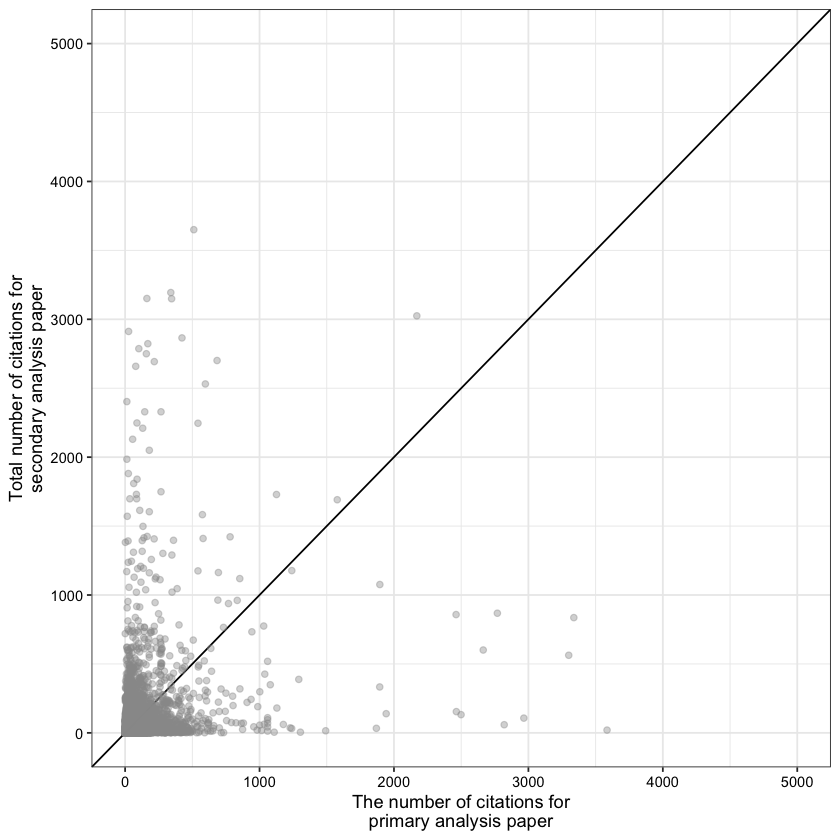

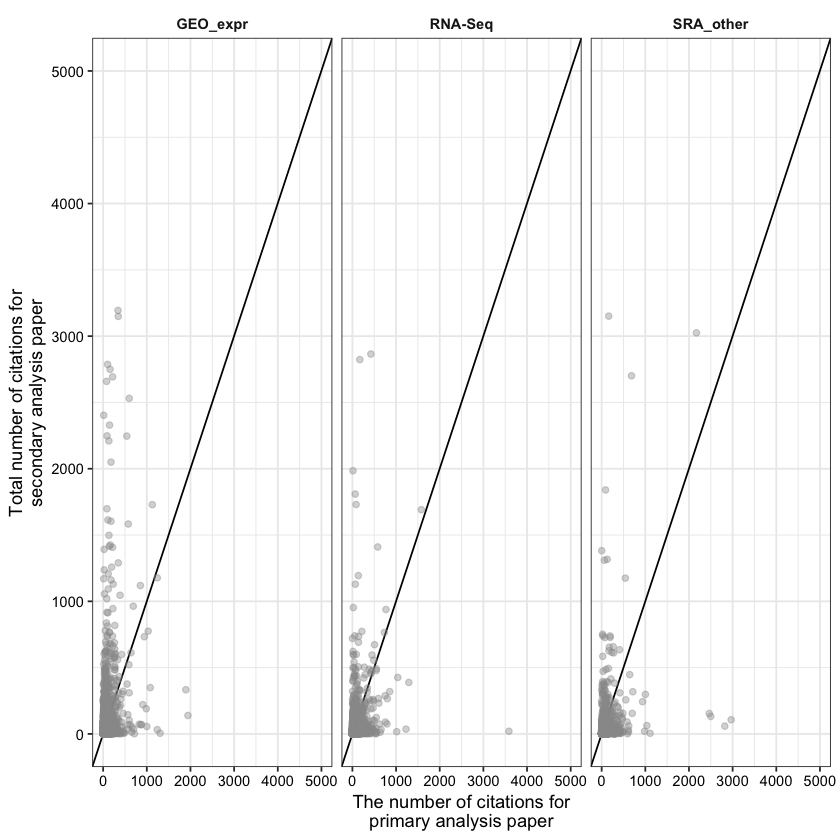

In [19]:
ggplot(gg_dat, aes(primary_citation, secondary_citation)) +
  geom_abline(intercept = 0, slope = 1) + 
  geom_point(color="grey60", alpha = .4) +
  theme_bw() +
  xlim(0, 5000) + ylim(0, 5000) +
  xlab("The number of citations for\nprimary analysis paper") +
  ylab("Total number of citations for\nsecondary analysis paper") +
  theme(axis.text = element_text(color = "black")) +
  ggsave("fig_citation_reusability/citation_zoom.png",units = "in",width = 5, height = 5)

gg_dat %>% filter(class != "") %>% 
  ggplot(aes(primary_citation, secondary_citation)) +
  geom_abline(intercept = 0, slope = 1) + 
  geom_point(color="grey60", alpha = .4) +
  theme_bw() +
  xlim(0, 5000) + ylim(0,5000) +
  xlab("The number of citations for\nprimary analysis paper") +
  ylab("Total number of citations for\nsecondary analysis paper") +
  facet_grid(~class) +
  theme(axis.text = element_text(color = "black"),
        strip.background = element_blank(),
        strip.text = element_text(face = "bold")) +
  ggsave("fig_citation_reusability/citation_zoom2.png",units = "in",width = 10, height = 5)



# 3-1. plot for primary citation and secondary citation (zoom) (reused at least 10 times)

Warning message:
“Removed 7 rows containing missing values (geom_point).”
Warning message:
“Removed 7 rows containing missing values (geom_point).”
Warning message:
“Removed 7 rows containing missing values (geom_point).”
Warning message:
“Removed 7 rows containing missing values (geom_point).”


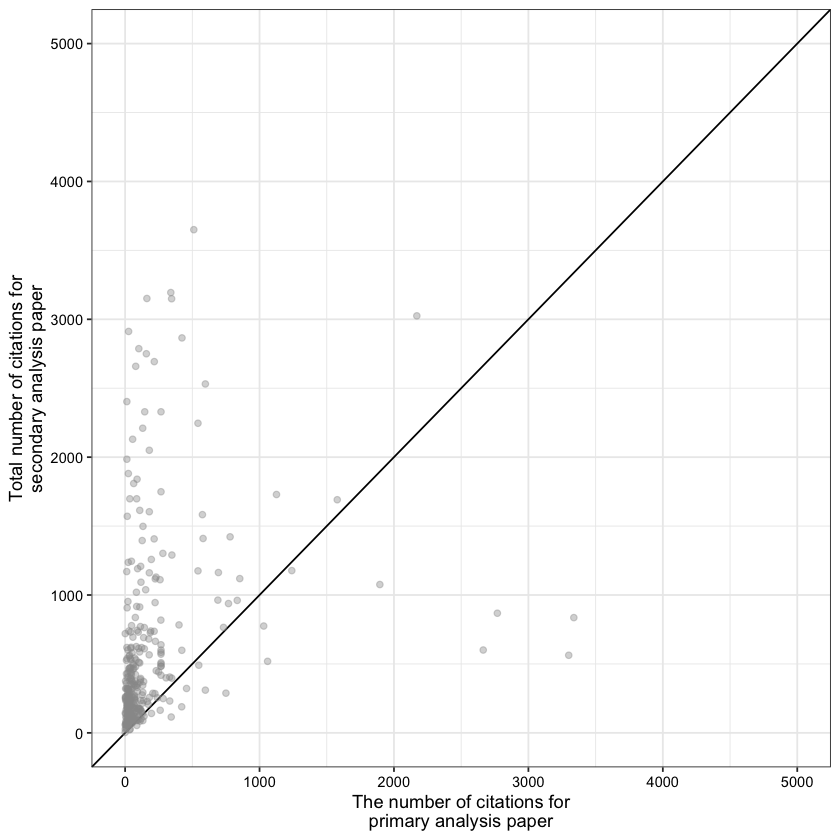

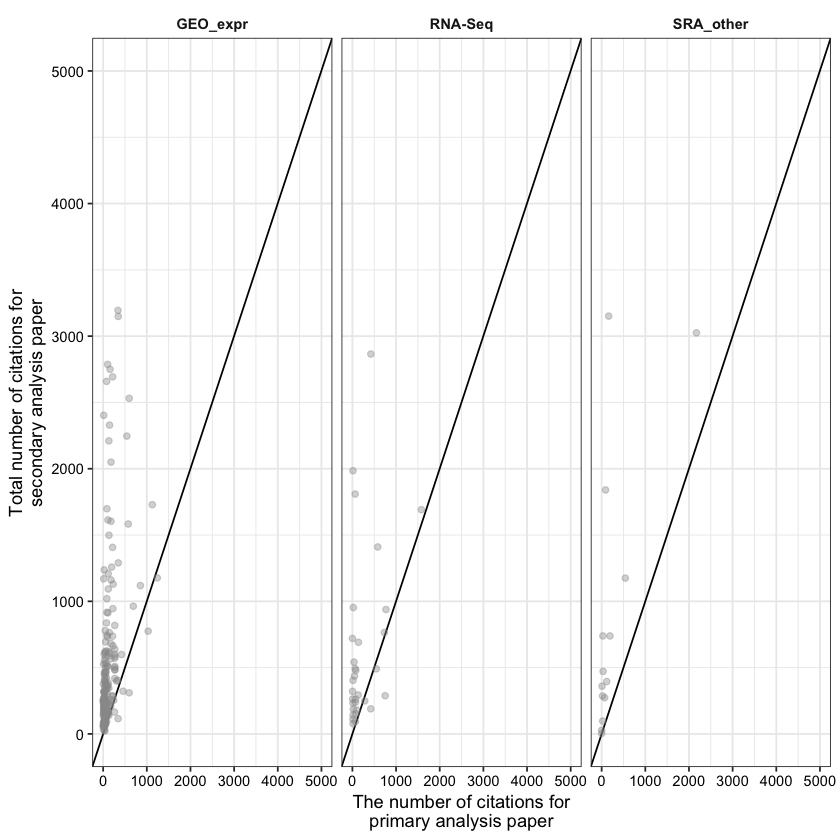

In [20]:
ggplot(f_gg_dat, aes(primary_citation, secondary_citation)) +
  geom_abline(intercept = 0, slope = 1) + 
  geom_point(color="grey60", alpha = .4) +
  theme_bw() +
  xlim(0, 5000) + ylim(0, 5000) +
  xlab("The number of citations for\nprimary analysis paper") +
  ylab("Total number of citations for\nsecondary analysis paper") +
  theme(axis.text = element_text(color = "black")) +
  ggsave("fig_citation_reusability/citation_reuse10fitering_zoom.png",units = "in",width = 5, height = 5)

f_gg_dat %>% filter(class != "") %>% 
  ggplot(aes(primary_citation, secondary_citation)) +
  geom_abline(intercept = 0, slope = 1) + 
  geom_point(color="grey60", alpha = .4) +
  theme_bw() +
  xlim(0, 5000) + ylim(0,5000) +
  xlab("The number of citations for\nprimary analysis paper") +
  ylab("Total number of citations for\nsecondary analysis paper") +
  facet_grid(~class) +
  theme(axis.text = element_text(color = "black"),
        strip.background = element_blank(),
        strip.text = element_text(face = "bold")) +
  ggsave("fig_citation_reusability/citation_reuse10fitering_zoom2.png",units = "in",width = 10, height = 5)


# 4. Citation and reuse count

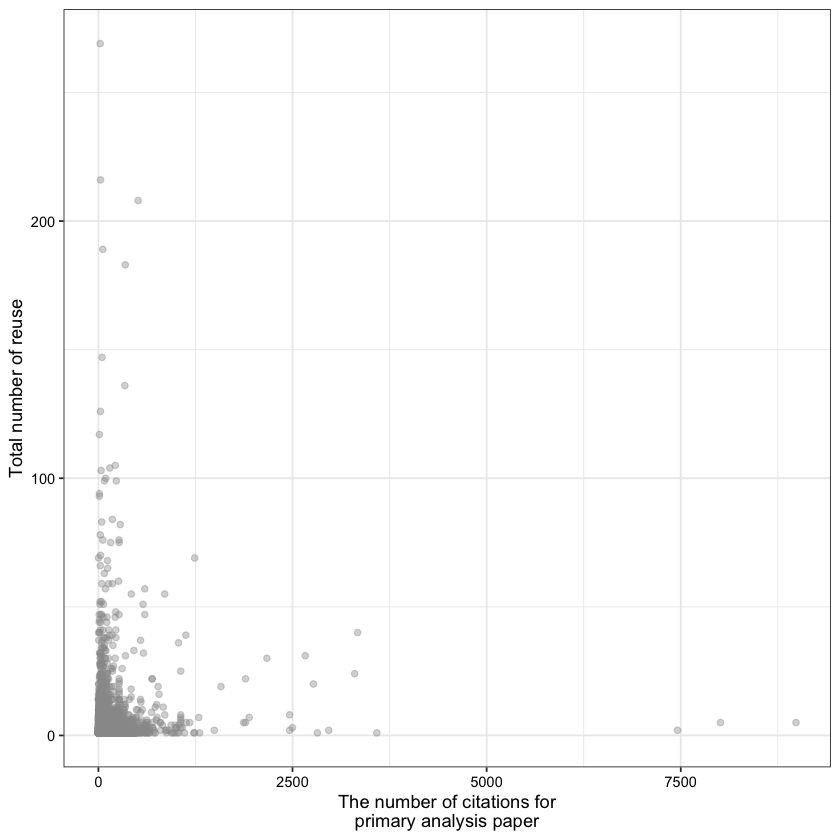

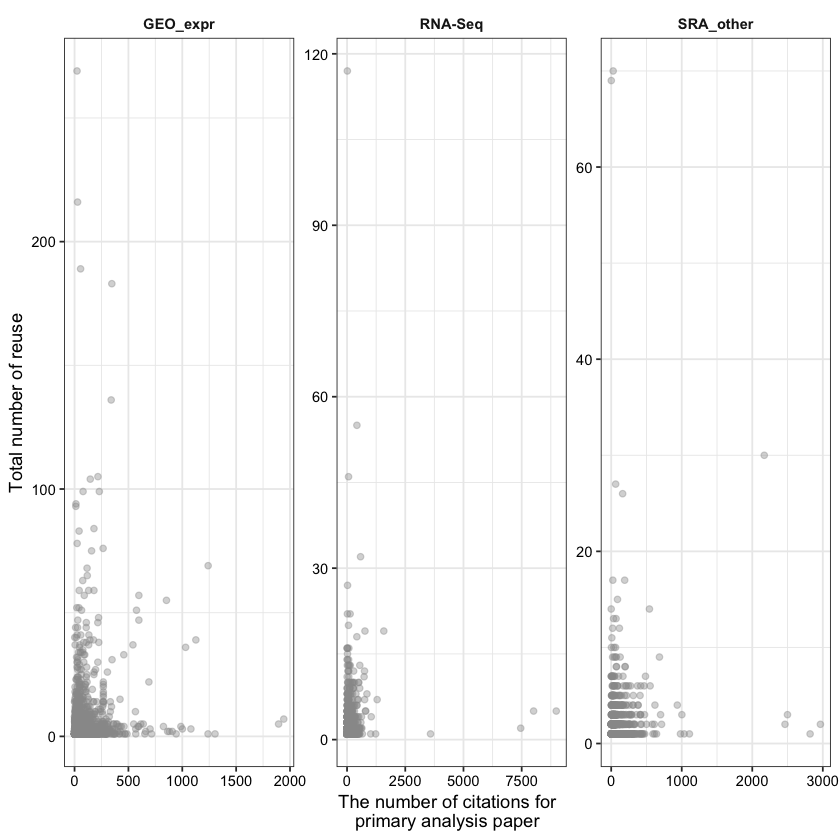

In [21]:
ggplot(gg_dat, aes(primary_citation, reuse_count)) +
  geom_point(color="grey60", alpha = .4) +
  theme_bw() +
  xlab("The number of citations for\nprimary analysis paper") +
  ylab("Total number of reuse") +
  theme(axis.text = element_text(color = "black"))  +
  ggsave("fig_citation_reusability/citation_reuse.png",units = "in",width = 5, height = 5)


gg_dat %>% filter(class != "") %>% 
  ggplot(aes(primary_citation, reuse_count)) +
  geom_point(color="grey60", alpha = .4) +
  theme_bw()+
  xlab("The number of citations for\nprimary analysis paper") +
  ylab("Total number of reuse") +
  facet_wrap(~class, scales = "free") +
  theme(axis.text = element_text(color = "black"),
        strip.background = element_blank(),
        strip.text = element_text(face = "bold"))  +
  ggsave("fig_citation_reusability/citation_reuse2.png",units = "in",width = 10, height = 5)

## 4-1. Citation and reuse count (reused at least 10 times)

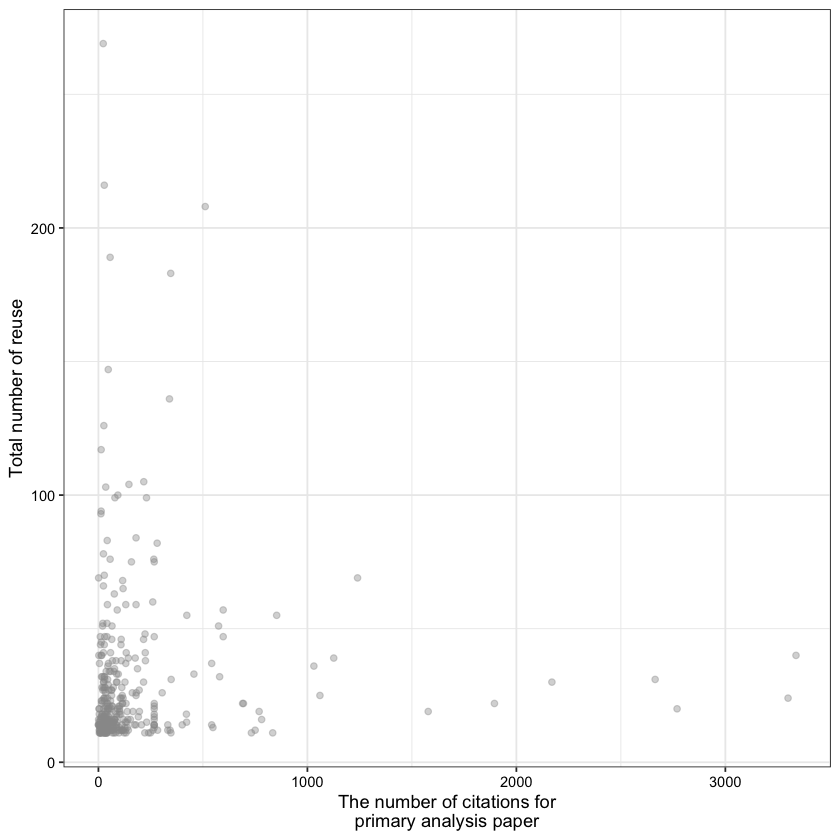

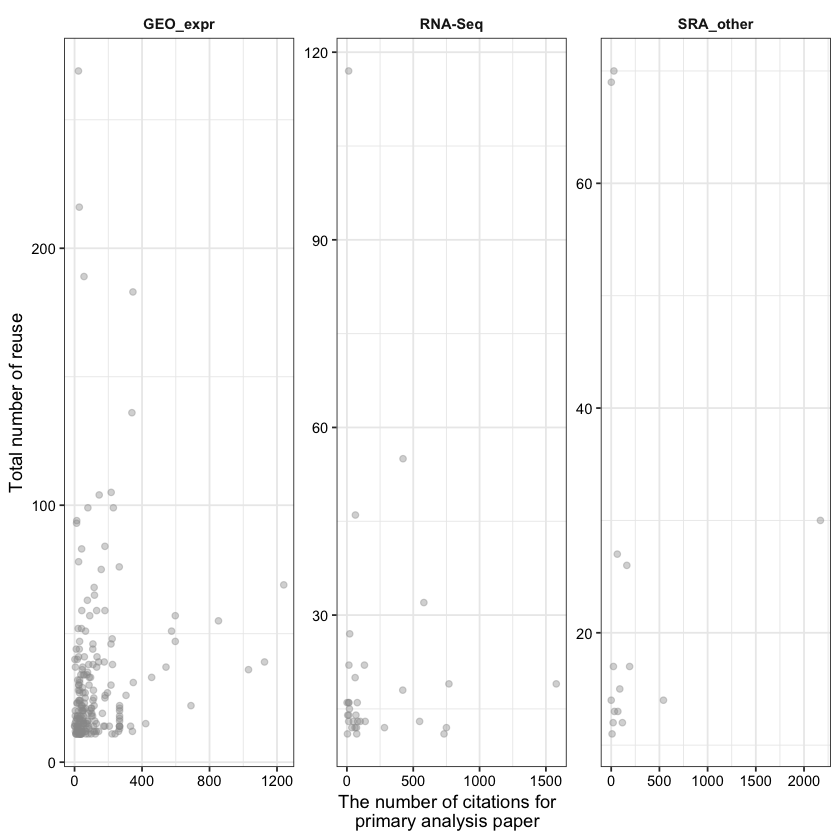

In [22]:
ggplot(f_gg_dat, aes(primary_citation, reuse_count)) +
  geom_point(color="grey60", alpha = .4) +
  theme_bw() +
  xlab("The number of citations for\nprimary analysis paper") +
  ylab("Total number of reuse") +
  theme(axis.text = element_text(color = "black"))  +
  ggsave("fig_citation_reusability/citation_reuse_reuse10fitering.png",units = "in",width = 5, height = 5)


f_gg_dat %>% filter(class != "") %>% 
  ggplot(aes(primary_citation, reuse_count)) +
  geom_point(color="grey60", alpha = .4) +
  theme_bw()+
  xlab("The number of citations for\nprimary analysis paper") +
  ylab("Total number of reuse") +
  facet_wrap(~class, scales = "free") +
  theme(axis.text = element_text(color = "black"),
        strip.background = element_blank(),
        strip.text = element_text(face = "bold"))  +
  ggsave("fig_citation_reusability/citation_reuse_reuse10fitering2.png",units = "in",width = 10, height = 5)

## Session information

In [23]:
devtools::session_info()

─ Session info ───────────────────────────────────────────────────────────────
 setting  value                       
 version  R version 4.0.2 (2020-06-22)
 os       macOS Catalina 10.15.7      
 system   x86_64, darwin17.0          
 ui       X11                         
 language (EN)                        
 collate  en_US.UTF-8                 
 ctype    en_US.UTF-8                 
 tz       America/Los_Angeles         
 date     2020-10-09                  

─ Packages ───────────────────────────────────────────────────────────────────
 package     * version date       lib source        
 assertthat    0.2.1   2019-03-21 [1] CRAN (R 4.0.2)
 backports     1.1.10  2020-09-15 [1] CRAN (R 4.0.2)
 base64enc     0.1-3   2015-07-28 [1] CRAN (R 4.0.2)
 blob          1.2.1   2020-01-20 [1] CRAN (R 4.0.2)
 broom         0.7.1   2020-10-02 [1] CRAN (R 4.0.2)
 callr         3.5.0   2020-10-08 [1] CRAN (R 4.0.2)
 cellranger    1.1.0   2016-07-27 [1] CRAN (R 4.0.2)
 cli           2.0.2   2020